# 12. Data Visualisation 

Data visualisations such as graphs and diagrams often make it easier for researchers to explore patterns and trends within large data sets, or to identify notable exceptions to the trends that can be observed. 

During the last number of years, a large number of visualisation libraries have been developed for the Python language. One of the most widely used libraries is `matplotlib`. This tutorial concentrates on three types of visualisations that you can create using matplot: bar charts, line charts and scatter plots. `Matplotlib` is very powerful, but its code can easily get quite complicated. The visualisation library named `seaborn` was built, more or less, as a shell around `matplotlib` and simplifies many of its aspects. This tutorial also explains a number of visualisations that can be created using `seaborn`.


## The data to be visualised


Data visualisations are obviously based on data. The data to be used in the remainder of this tutorial are created below. The data set contains four columns with numerical data. These have the column names 'A', 'B', 'C' and 'D'. There is also a column called 'class' containing a categorical variable. The column 'year', finally, contains years. 

In [109]:
import pandas as pd

data = [ [12,5,6,12] , 
[14,11,17,18] , 
[15,6,8,19] , 
[17,3,21,15] , 
[10,9,14,21] , 
[14,7,8,19] , 
[6,8,10,20] , 
[5,8,9,21] , 
[19,4,6,16] , 
[11,12,12,22] ] 

df = pd.DataFrame(data, columns = ['A', 'B' , 'C' , 'D'] ) 

df['class'] = [ 'Category1' , 'Category1' , 'Category1' , 'Category2' , 'Category2' ,  'Category3' , 'Category3' , 'Category4' , 'Category4' , 'Category4'  ]

df['year'] = ( 2000 , 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009 )


Using the `groupby()` function from `pandas`, we can easily divide the existing data frame into groups, based on the categories defined in the column `class`. We can also apply statistical functions, such as `sum()`, to each of these groups. 

The code below creates a variable (of type `Series`) named `sum_A`. The indexes of this Series contain the various labels of the categories ('Category1', 'Category2', etc.). The values that are connected to these indexes contain the sum of the values in column A, for each of these categories. 

In [110]:
sum_A = df.groupby( 'class' )['A'].sum()

The indexes and the values of this `Series` variable can be printed separately, as follows: 

In [111]:
print( sum_A.index.tolist() ) 
print( sum_A.tolist() )

['Category1', 'Category2', 'Category3', 'Category4']
[41, 27, 20, 35]


These values will be used in the visualisations that are discusses below. 


# Matplotlib


## A bar chart


To create a regular bar chart, we need to work with two variables: (1) the values to be shown on the X-axis and (2) the values to be shown on the Y-axis. In this section, we create a bar chart which visualises the sums of all the values in column A, for each of the categories identified in column 'class'. As explained above, we can create a list of all the available categories using `sum_A.index.tolist()`, and the totals of all the values in column 'A', broken down by category, can be retrieved using the code `sum_A.tolist()`. The former values need to be shown on the X-axis and the latter values on the Y-axis.

In [112]:
x_axis = sum_A.index.tolist()
y_axis = sum_A.tolist()

To create a plot using the matplotlib library, you firstly need to import matplotlib's ```pyplot``` module. To reduce the amount of typing, the name of the module can be imported under a shorter alias. The code below uses the alias ```plt```.

In [113]:
import matplotlib.pyplot as plt

The ```pyplot``` module is in fact a collection of functions that can be used to change the nature and the appearance of a plot. It is convenient, as a first step, to add a figure and a set of axes to a plot. They can be added as follows.

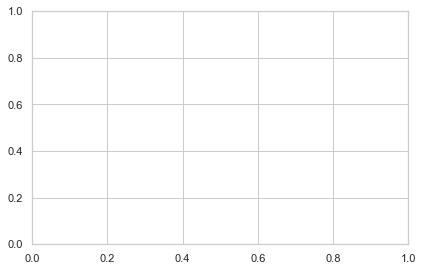

In [114]:
fig = plt.figure()
ax = plt.axes()

A figure can be thought of as an empty canvas on which you can place your diagrams. Axes, secondly, is a class which consists of a combination of an X-axis and a Y-axis. These axes also includes the ticks and the labels for these ticks. All the data that you need for your visualization will be placed on these axes. 

As is demonstarted below, the size of the plot can be changes by working with the figsize parameter in ```figure()```. This parameter demands two numbers, given in parentheses. These two numbers specify the width and the height of the figure, respectively. 
 
Creating a bar chart is fairly straightforward. To do this, you can make use of the ```bar()``` method of Axes. At a minimum, the method demands two parameters: the values that need to be shown on the X-axis, and the values that need to be shown on the Y-axis. These values can be given in the form of lists. The former list contains the words that are connected to the ticks on the X-axis, and the values in the latter list determine the heights of the various bars. 

Importantly, you need to conclude the code that creates the data visualisation with the command plt.show(). Without this command, the visualisation will not be created. The command should be used only once.

N.B. When you add the line ```%matplotlib inline``` to a code block in a Jupyter Notebook, the graph that is created is also shown within the notebook.

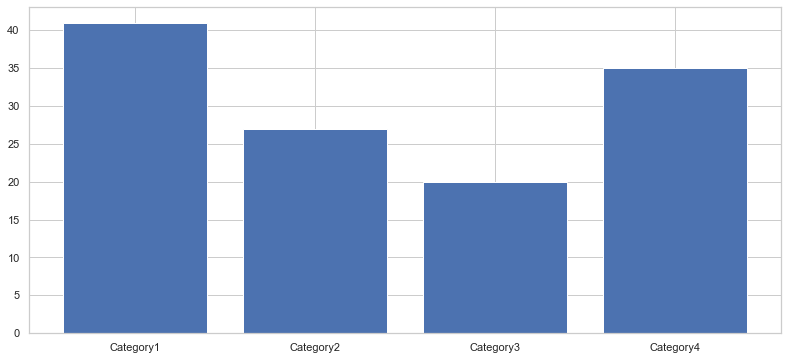

In [115]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure( figsize=(12,6) )
ax = plt.axes()

ax.bar( x_axis , y_axis )

plt.show()


The appearance of the bar chart can be adjusted via a number of parameters in the ```bar()``` function of Axes. You can specify the ```width``` and the ```color``` of the bars, for instance. As values for ‘color’, you can provide hexadecimal colour codes. The opacity of the bars can be manipulated using the ```alpha``` parameter.

If the labels printed next to or underneath the ticks on the axes cannot be read, because of overlapping labels, for instance, it may be useful to change the orientation of these labels by making use of the ```xticks()``` or the ```yticks()``` methods in pyplot. The parameter in this method determines the rotation angle. 

It is advisable, furthermore, to annotate and to describe your data visualisations as much as possible. You can add a label for the X-axis and the Y-axis using the methods ```set_xlabel()``` and ```set_ylabel()```. The method ```set_title()``` may be used to add a general title to the plot. The string that is supplied within parentheses will be shown above the bar chart. These three methods can be used with a parameter named ```fontsize```.


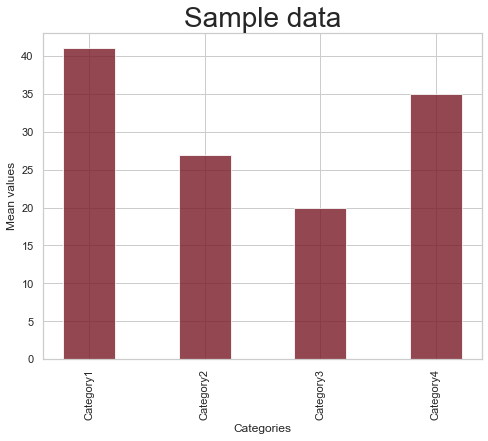

In [116]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd


fig = plt.figure( figsize=( 7 ,6 ) )
ax = plt.axes()


bar_width = 0.45
opacity = 0.8

ax.bar( x_axis , y_axis , width = bar_width, alpha = opacity , color = '#781926')

plt.xticks(rotation= 90)

ax.set_xlabel('Categories' , fontsize= 12)
ax.set_ylabel('Mean values' , fontsize = 12 )
ax.set_title( 'Sample data' , fontsize=28 )


plt.show()


## A line chart 

To create a line chart, you need to make use of the plot() method of the pyplot module. The following code create a line chart which displays the values in the column 'year' on the X-axis, and the corresponding values in column 'D' on the Y-axis. 

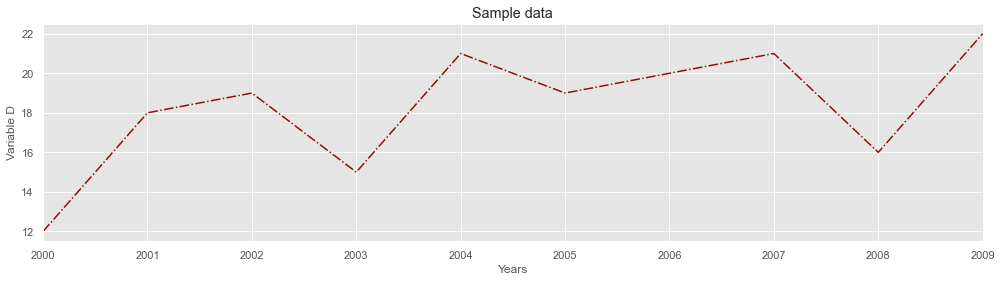

In [117]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig = plt.figure( figsize = ( 15, 4))
ax = plt.axes()

ax.plot( df['year'] , df['D'] , color = '#930d08' , linestyle = 'dashdot')

ax.set_xlabel('Years')
ax.set_ylabel('Variable D')


ax.set_xlim( df['year'].min() , df['year'].max() )

ax.set_title( 'Sample data')

plt.show()

The code above also demonstrates a number of additional possibilities of matplotlib. The ```plt.style.use()``` method changes the style of the graph. In themselves, the matplotlib graphics have a fairly plain and simple appearance. The style of the graphs can be modified by applying stylesheets. The code above applies the stylesheet named 'seaborn-pastel'. The box below lists a number of other options. 

In [118]:
plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-pastel')
plt.style.use('ggplot')
plt.style.use('grayscale')

## To see all the stylesheets that are 
## available, use the following:

# print( plt.style.available )


Like ```bar()```, the ```plot()``` method expects two parameters: the values for the X-axis, and the values for the Y-axis. It is also possible to specify the line style for the line chart. You can choose one of the options below:

In [119]:
linestyle='solid'
linestyle='dashed'
linestyle='dashdot'
linestyle='dotted'

Matplotlib normally infers the limits of the X-axis and the Y-axis from your data. In some cases, however, you may want to adjust the limits of the axes yourself. 

As is illustrated, you can do this via ```set_xlim()```. The corresponding method for the Y-axis is ```set_ylim()```.  These two methods take two parameters: the lowest value and the highest value. The two numbers that you mention determine the range of values that you shall see on the X-axis and the Y-axis.

## Saving images

Next to opening the graph in a viewer on your screen, using show(), it is also possible to instruct Python to create an image file on your computer, via the ```savefig()``` method. As the first parameter to this function, you must provide a filename. The filename must include an extension, such as ‘jpeg’, ‘tiff’, ‘png’ or ‘pdf’. The methods savefig() and show() are mutually exclusive. When you use one of these, you cannot use the other. 

## A scatter plot

A scatter plot is a data visualisation that makes use of dots to represent the values of two numerical variables. To create a scatterplot, you need to use the method ```scatter()``` in the Axes Class. Like ```plot()``` and ```bar()```, the ```scatter()``` method minimally demands two parameters: the values to be shown on the X-axis and the values that need to be plotted on the Y-axis. The sizes of the dots can be specified in the ```s``` parameter. 



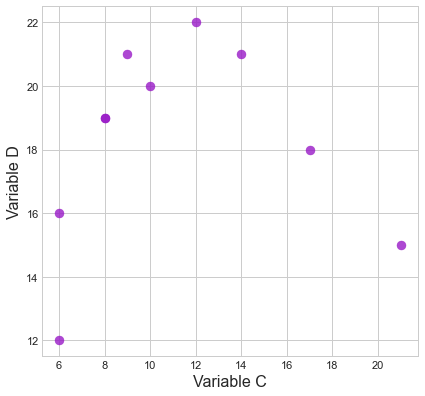

In [120]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')


fig = plt.figure( figsize = ( 6,6 ))
ax = plt.axes()


ax.scatter( df['C'] , df['D'] , alpha=0.8,  s=80 , c = '#991ac7')

ax.set_xlabel('Variable C' , fontsize = 16 )
ax.set_ylabel('Variable D' , fontsize = 16 )

plt.show()

The colours of the dots in the scatter plot can be specified via a parameter called `c`. This parameter can be assigned a single static colour, as in the example above. 

When your data set includes a categorical variable, such as the variable named 'class' in the sample data set that is used in this tutorial, it can be helpful of the colours or the points can also vary along with the categories they belong to. Such more dynamic ways colouring the points can help to explore the differences between the various categories. 

To accomplish this, we must pass a list of colour code as a value to the `c` parameter. This list must have exactly the same number of items as the number of dots to be shown in the scatter plot. Basically, this list assigns a colour to each item in these lists. The code below creates a list of colours, also named `colours`, based on the values in the 'class' column.

When the dots are displayed in different colours, it can obviously be useful to add a legend to explain the meaning of these colours. As will be shown below, the process of creating a legend is easier when we also have a dictionary which associates colours with labels for these colours. Next to a list of colours, the code below also creates a dictionary, named `legendDict`, which links colours to categories.

In [121]:
colours = []
legendDict = dict()

for index , row in df.iterrows():

    if row["class"] == 'Category1':
        colours.append( '#a88732' )
        legendDict[ colours[index] ] = row["class"]
    elif row["class"] == 'Category2':
        colours.append( '#265c28' )
        legendDict[ colours[index] ] = row["class"]
    elif row["class"] == 'Category3':
        colours.append( '#a0061a' )
        legendDict[ colours[index] ] = row["class"]
    else:
        colours.append( '#431670' )
        legendDict[ colours[index] ] = row["class"]

The list and the dictionary can be used, subsequently, in the code that creates the scatter plot. The plot itself is created, again, using the `scatter()` method. In this version of the scatter plot, the `c` parameter is assigned the `colours` list that was created earlier. 

As was already mentioned earlier, the `s` parameter of the `scatter()` method determines the sizes of the points. In the previous example, `s` was assigned a fixed value. In the value below, however, the `s` parameter is connected to the values in column 'A' (multiplied by 20, to make the differences more pronounced). The sizes of the points thus help to give information about the values in column A. 

The last few lines of the example below also generates a legend. It uses the legendDict created earlier. I this dictionary, the indexes store the colours, and the values store the labels associated with these colours. The code navigates across all the available colours, using the `for` keyword. It adds all of these colours to the diagram, via the `label` parameter of the `scatter()` method. It does not add any new points to the diagram, however. The first two parameters (which normally define the values to be shown on the X-axis and the Y-axis), contain empty lists. 

The legend is added, finally, using the legend() method, as illustated. This method can be used with the ```loc()``` parameter, which specifies the location of the legend, and the ```frameon()``` method. With frameon = False, the legend will be shown in a frame. When you use frameon = False, the background of the legend will become transparent.

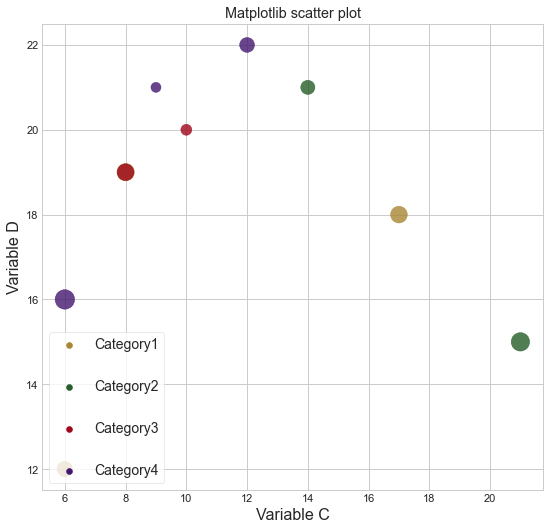

In [122]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')


fig = plt.figure( figsize = ( 8,8 ))
ax = plt.axes()


ax.scatter( df['C'] , df['D'] , c = colours , alpha=0.8,  s= df['A'] * 20 )

ax.set_xlabel('Variable C' , fontsize = 16 )
ax.set_ylabel('Variable D' , fontsize = 16 )

plt.title('Matplotlib scatter plot')


for item in legendDict:
    plt.scatter( [], [], c = item , label = legendDict[item] )

plt.legend(loc=3 , frameon=True ,  prop={'size': 14} )


plt.show()

# Seaborn 

As you noticed, the code that is needed to create a visualisation in matplotlib can quickly become complicated, especially if you want to work with different colours and with legends. 

The whole process of working with colours and legends can be simplified enormously if we replace some of the methods from matplotlib with methods from the `seaborn` library. This latter visualisation library may be viewed as as extention and as a simplification of `matplotlib`. According to its [documentation]
(http://seaborn.pydata.org/index.html), `seaborn` "provides a high-level interface for drawing attractive and informative statistical graphics". You can use `seaborn` to create fairly complicated visualisations using a limited number of functions, and, fortunately, much of the processing takes place behind the scenes. 

A second important advantage of `seaborn` is that it works well in combination with `pandas`, a Python library for data analysis. 

To work with the methods from `seaborn`, the library firstly needs to be imported. The alias 'sns' is conventional. When you work with `seaborn`, you also need to import `matplotlib`, as this is the library `seaborn` is based on. 

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt 

## A scatter plot

Scatter plots can be created using the `scatterplot()` method. The `data` parameter needs to refer to `pandas` data frame containing the dataset you want to visualise. The parameters `x` and `y` specify the variables (i.e. the columns) from this dataset that should be displayed on teh X-axis and the Y-axis, respectively.  

You can specify a fixed colour for the points using the `color` parameter, and the size of the points can be set using the `s` parameter.  



If you want to change the size of the figure, you can use the `figure()` method from `matplotlib`'s `pyplot` module. As values for the `figsize` parameter, you can specify the width and the height of the graph in inches.  To save the image that is created, however, you can work with the `savefig()` method.

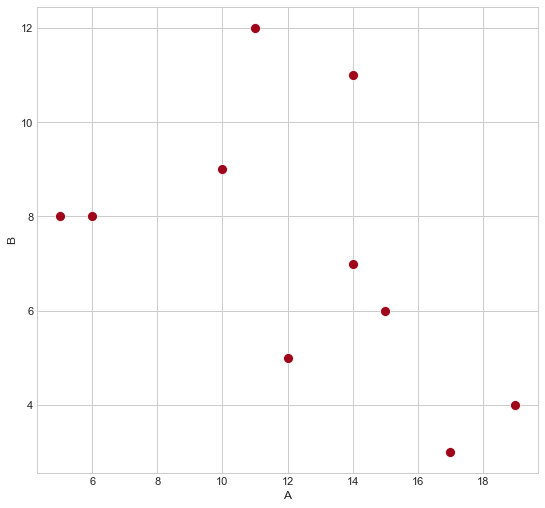

In [124]:
fig = plt.figure( figsize = ( 8,8 ))
plt.style.use('seaborn-whitegrid')

ax = sns.scatterplot( data = df , x = 'A' , y = 'B' , color = '#a0061a' , s = 100 ) 

plt.savefig('scatterplot.jpg')

The code above is not necessarily more efficient that the code that you would use for this task in matplotlib. The true value of seaborn becomes apparent, however, when we want to create a scatter plot in which the sizes and the colours of the point are determined by the values from our data set. To let the colours of the points represent the values in a specific column, you can simply mention the name of this column in the `hue` parameter. In the code below, you can see that the hues are determined by the values of the `class` column.

You can also let the sizes of the points vary along with the values in a specific column by supplying the name of this column as the value of the `size` parameter. The point sizes in the graph below represent the values in the column named 'A'. 

When the actual values in the column that you associate with the `size` parameter are too small, you can rescale these values using the `sizes` parameter, which demand two values: a minimum size and a maximum size. The values of the column that is mentioned in `size` will then be rescaled, on the range that is determined by these minimum and maximum size. 

In the `palette` parameter, we can specify the colours to be used in the scatter plot. Examples of existing colour palettes include “Blues”, “BuGn”, “YlOrRd”, “GnBu”, “OrRd”, “Greens”, “Reds”. You can also define a list of colours yourself, and use the name of this list as value for the `palette` parameter. I this case, the number of items in this list must be equal to or higher than the number of options If we leave out the `palette` parameter, seaborn will choose its own colours. 


When the `hue` and/or the `size` parameter is used in the `scatterplot()` method, `seaborn` will add a legend automatically. To make sure that the legend is shown outside of the graph, you can add the following line of code:

```
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
```


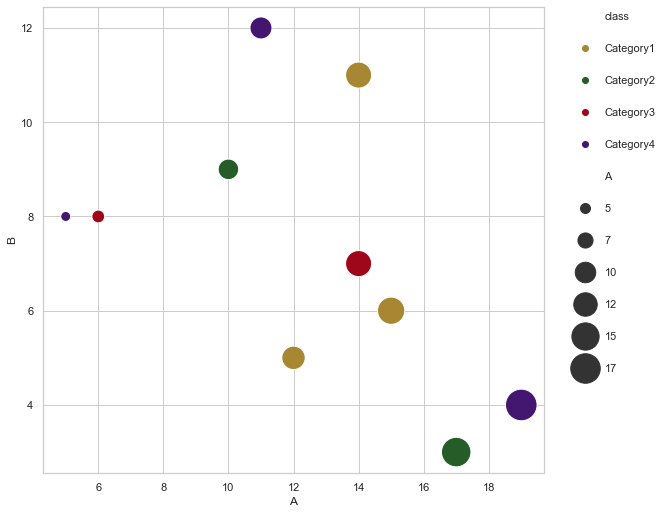

In [125]:
colours = [  '#a88732' ,  '#265c28' , '#a0061a' ,  '#431670' ]

## The line below applies a stylesheet
## and also adds spacing in between the lines of the legend 
sns.set(style='whitegrid', rc = {'legend.labelspacing': 2})


fig = plt.figure( figsize = ( 8,8 ))

ax = sns.scatterplot(x = 'A' , y = 'B' , data=df,  legend = 'brief' ,  hue= 'class' , size = 'A' , sizes=( 100 , 1000), palette = colours )

# this next line makes sure that the legend is shown outside of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

## A bar plot

Bar plots can be created using the `barplot()` method. As is the case for the `scatterplot()` method, `barplot()` takes a `data` parameter which need to refer to a `pandas` dataframe, together with an `x` and a `y` parameter. The former parameter specifies the values to be shown on the X-axis, and the latter parameter specifies the height iof the bars that are drawn. The `hue` parameter can be used to vary the colours of the bars. If this parameter refers to a categorical variable, each unique value for this variable will be assigned a different colour. To make sure that the bars do not overlap, you can set the value of the `dodge` parameter to 'False'. 



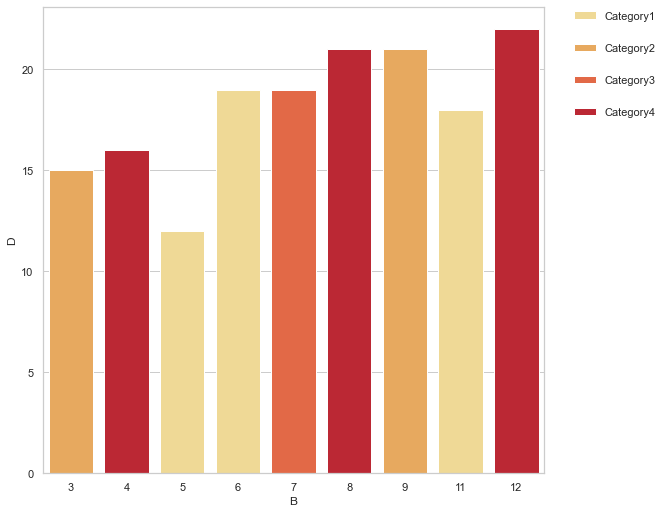

In [126]:
fig = plt.figure( figsize = ( 8,8 ))

ax = sns.barplot( data = df , x = 'B' , y= 'D' , hue = 'class' , dodge = False , palette = 'YlOrRd')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## A line plot

To create a line plot, use the `lineplot()` method. The colour of the line can be changed using the `color` parameter.

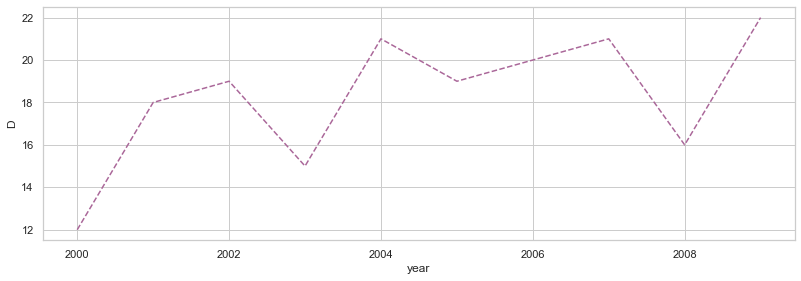

In [127]:
fig = plt.figure( figsize = ( 12, 4))
ax = sns.lineplot(x="year", y="D" , data= df , color  = '#AA6799' , linestyle='dashed' )

## A count plot

You can see that, using seaborn, you can create fairly advanced plots with only a few lines of code. 

If you want to see the number of items for each of the categories that have been assigned in the `class` column, for instance, you can work with the `countplot()` method, as follows.

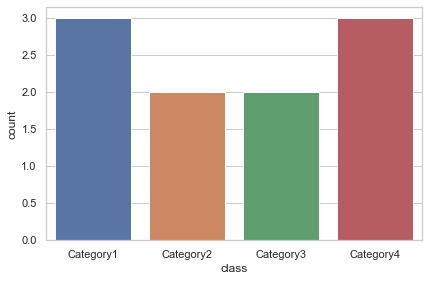

In [128]:
ax = sns.countplot(x="class", data= df )

## A boxplot

With seaborn, we can also create many other types of visualisations. A boxplot, for instance, is a diagram which visualises the minimum, the maximum, the median and the first and third quartiles. It can be created using the `boxplot()` method. 

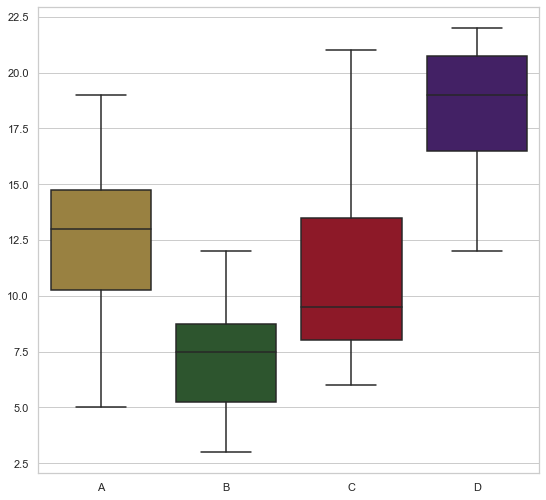

In [129]:
fig = plt.figure( figsize = ( 8, 8))

## A new data frame is created, containing only the numerical variables
## The categorical variables ('year' and 'class') are removed.
df2 = df.filter( [ 'A' , 'B' , 'C' , 'D' ] )
 
ax = sns.boxplot(data=df2 , palette = colours );

## A heatmap 

In seaborn, a heatmap clarifying the correlations among the variables in the data set can be created using only two lines of code. The heapmap below suggests that there is moderate correlation between variables 'B' and 'D'.

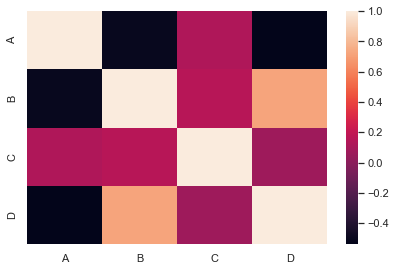

In [130]:
## Correlations can be calculated using pandas' corr() 
correlations = df2.corr()
 
# Heatmap
ax = sns.heatmap(correlations)

## Density plot

To visualise density regions, you can work with `kdeplot()`.

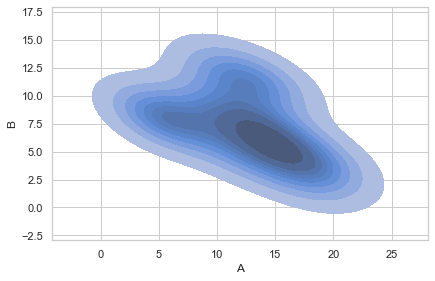

In [131]:
ax = sns.kdeplot( data = df , x= 'A' , y = 'B' , shade=True )

Many other types are diagrams can be created. For more information, visit the [gallery](https://seaborn.pydata.org/examples/index.html) or the [tutorials](https://seaborn.pydata.org/tutorial.html) on the seaborn website. 

# Exercises

# Exercise 12.1

In exercise 11.3, you created a CSV file named 'prices_of_coffee_over_time.csv', containing data about the average price of a pound of coffee on a range of dates. Use this CSV file to create a line chart which visualises the development of these prices over time. 

# Exercise 12.2

Download the following data set:

https://edu.nl/bcm4x

This file contains data collected for the [2018 Better Life Index](https://stats.oecd.org/index.aspx?DataSetCode=BLI), which was created by the OECD to visuale some of the key factors  that contribute to well-being in OECD countries, including education, income, housing and environment.

Using this data set, create a bar chart which can be used to compare either the 'personal_earnings' or the 'life_satisfaction' in OECD countries. 

# Exercise 12.3

Using the CSV file that you have downloaded for exercise in 12.2 to create a scatter plot. The X-axis must visualise the values in the column 'self-reported_health', and the Y-axis must show the 'employment_rate'. The size of the points must represent the 'educational_attainment' and the colour of the points ust indicate the 'air_pollution'. 

## Exercise 12.4

PISA is the OECD's [Programme for International Student Assessment](https://www.oecd.org/pisa/). This programme evaluates educational systems globally by measuring the performance of 15 year-old-children in mathematics, science and reading. The latest study is from 2018. 

The CSV file '[pisa.csv](https://edu.nl/p97ma)' contains all the scores measured for mathematics and reading in between 2000 and 2018.  

Using Pandas, Matplotlib and Seaborn, create visualisations which can help to answer the following questions:

1. How did the various countries that were examined in 2018 perform? Which contries had the highest scores, and which countries had the lowest scores? How did the score of the Netherlands compare to those of other countries? You can limit the analyses to the the 'total' scores (i.e. those records in which column 'object' has value 'TOT'). 

2. Were the scores for reading correlated to the scores for mathematics in 2018? Answer this question by creating a scatter plot. 

3. How did the scores for reading develop in the Netherlands in between 2000 and 2018? Focus on the score for boys and for girls separately. 

4. Have the scores remained relatively stable over the years if we look at the total scores? Or has there been some variation? How does the variation of the scores for the Netherlands compare to the scores in France, Germany, Belgium and Luxembourg? Try to answer this question by crearing a boxplot. 